In [1]:
from transformers import AutoModel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cmap='RdBu'

# GPT2 Model

In [3]:
gpt2 = AutoModel.from_pretrained('gpt2-xl')
wpe_gpt = gpt2.wpe.weight.detach().numpy()

In [96]:
df = pd.DataFrame(wpe_gpt.flatten())
df.describe()

0
count  1.638400e+06
mean  -1.019791e-04
std    1.516441e-02
min   -2.057268e+00
25%   -2.466520e-03
50%   -1.503477e-05
75%    2.432974e-03
max    1.274699e+00

In [99]:
np.quantile(wpe_gpt, [1/3, 2/3])

array([-0.0015494 ,  0.00151722])

In [4]:
wpe_gpt.shape

(1024, 1600)

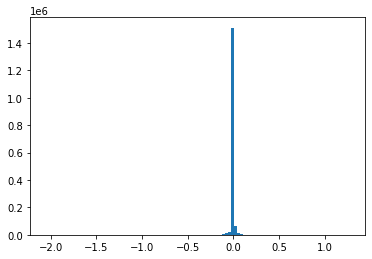

In [34]:
wpe_gpt_flat = wpe_gpt.flatten()
plt.hist(wpe_gpt_flat, bins=100)
plt.show()

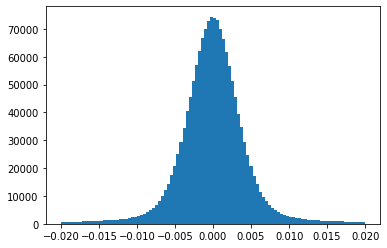

In [35]:
wpe_gpt_flat = wpe_gpt.flatten()
plt.hist(wpe_gpt_flat, bins=100, range=[-0.02, 0.02])
plt.show()

## Crop data

In [36]:
# crop data
wpe_gpt_f = wpe_gpt.copy()
wpe_gpt_f[wpe_gpt_f < -0.02] = -0.02
wpe_gpt_f[wpe_gpt_f > 0.02] = 0.02

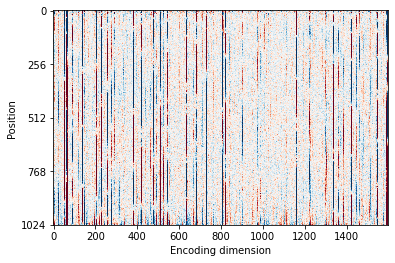

In [37]:
plt.imshow(wpe_gpt_f, interpolation="none", cmap=cmap)
plt.yticks([0,256,512,768,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

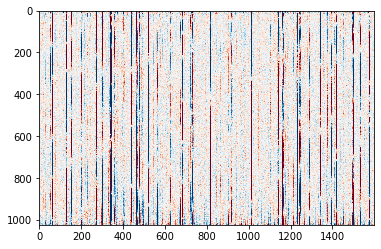

In [38]:
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_f, -1)
wpe_gpt_sort = wpe_gpt_f[:,wpe_gpt_sort_idxs]
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

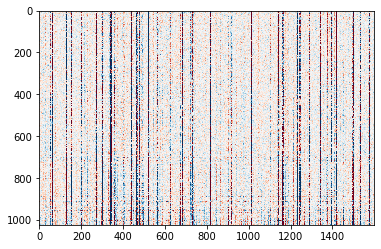

In [91]:
# 1/(1+np.exp(-(1000)*wpe_gpt_sort)wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_f, -1)
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_f, -1)
wpe_gpt_sort = wpe_gpt_f[:,wpe_gpt_sort_idxs]
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort.T, -1)
wpe_gpt_sort = wpe_gpt_sort.T[:,wpe_gpt_sort_idxs].T
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

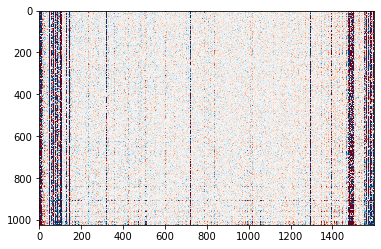

In [94]:
# 1/(1+np.exp(-(1000)*wpe_gpt_sort)wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_f, -1)
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_f.T, -1)
wpe_gpt_sort = wpe_gpt_f.T[:,wpe_gpt_sort_idxs].T
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort, -1)
wpe_gpt_sort = wpe_gpt_sort[:,wpe_gpt_sort_idxs]
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

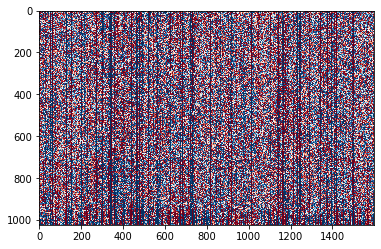

In [104]:
wpe_gpt_sort = 1/(1+np.exp(-(1000)*wpe_gpt_f))
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort, -1)
wpe_gpt_sort = wpe_gpt_sort[:,wpe_gpt_sort_idxs]
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort.T, -1)
wpe_gpt_sort = wpe_gpt_sort.T[:,wpe_gpt_sort_idxs].T
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

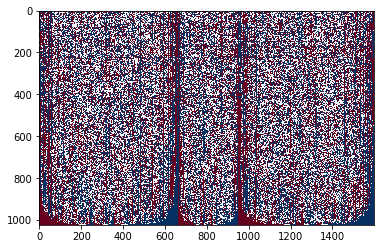

In [109]:
# discretizise wpe
quant_1_3, quant_2_3 = np.quantile(wpe_gpt, [1/3, 2/3])
sel_13 = wpe_gpt < quant_1_3
sel_23 = wpe_gpt > quant_2_3
sel_0 = ~(sel_13 | sel_23)
wpe_gpt_disc = np.empty_like(wpe_gpt)
wpe_gpt_disc[sel_13] = -1
wpe_gpt_disc[sel_0] = 0
wpe_gpt_disc[sel_23] = 1
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_disc, -1)
wpe_gpt_sort = wpe_gpt_disc[:,wpe_gpt_sort_idxs]
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort.T, -1)
wpe_gpt_sort = wpe_gpt_sort.T[:,wpe_gpt_sort_idxs].T
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

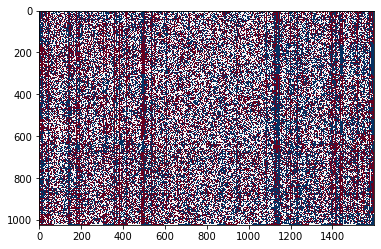

In [110]:
# discretizise wpe
quant_1_3, quant_2_3 = np.quantile(wpe_gpt, [1/3, 2/3])
sel_13 = wpe_gpt < quant_1_3
sel_23 = wpe_gpt > quant_2_3
sel_0 = ~(sel_13 | sel_23)
wpe_gpt_disc = np.empty_like(wpe_gpt)
wpe_gpt_disc[sel_13] = -1
wpe_gpt_disc[sel_0] = 0
wpe_gpt_disc[sel_23] = 1
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_disc.T, -1)
wpe_gpt_sort = wpe_gpt_disc.T[:,wpe_gpt_sort_idxs].T
wpe_gpt_sort_idxs = np.lexsort(wpe_gpt_sort, -1)
wpe_gpt_sort = wpe_gpt_sort[:,wpe_gpt_sort_idxs]
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

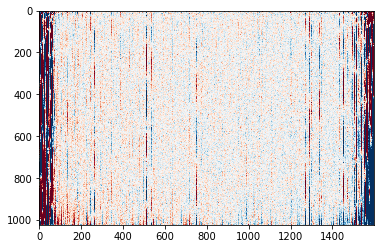

In [117]:
# sort row by their sum
wpe_gpt_sort_idxs = np.argsort(wpe_gpt.sum(1))
wpe_gpt_sort = wpe_gpt[wpe_gpt_sort_idxs,:]
# sort cols by their sum
wpe_gpt_sort_idxs = np.argsort(wpe_gpt_sort.sum(0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot with filter
plt.imshow(wpe_gpt_sort, vmin=-0.02, vmax=0.02, interpolation="none", cmap=cmap)

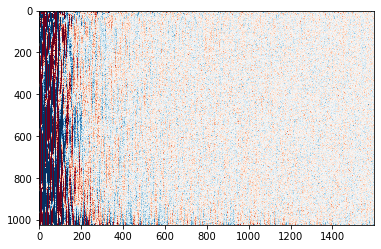

In [118]:
# sort row by their stddev
wpe_gpt_sort_idxs = np.argsort(-wpe_gpt.std(1))
wpe_gpt_sort = wpe_gpt[wpe_gpt_sort_idxs,:]
# sort cols by their stddev
wpe_gpt_sort_idxs = np.argsort(-wpe_gpt_sort.std(0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot with filter
plt.imshow(wpe_gpt_sort, vmin=-0.02, vmax=0.02, interpolation="none", cmap=cmap)

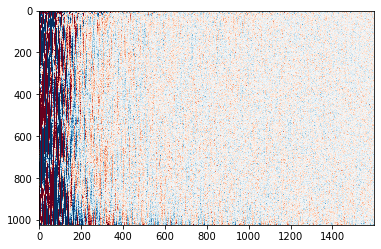

In [119]:
# sort row by their stddev
wpe_gpt_sort_idxs = np.argsort(-np.abs(wpe_gpt).std(1))
wpe_gpt_sort = wpe_gpt[wpe_gpt_sort_idxs,:]
# sort cols by their stddev
wpe_gpt_sort_idxs = np.argsort(-np.abs(wpe_gpt_sort).std(0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot with filter
plt.imshow(wpe_gpt_sort, vmin=-0.02, vmax=0.02, interpolation="none", cmap=cmap)

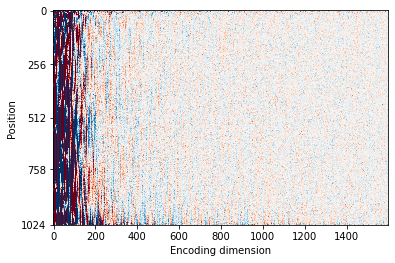

In [131]:
# sort row by their sum
wpe_gpt_sort_idxs = np.argsort(-wpe_gpt.std(1))
wpe_gpt_sort = wpe_gpt[wpe_gpt_sort_idxs,:]
# sort cols by their stddev
wpe_gpt_sort_idxs = np.argsort(-wpe_gpt_sort.std(0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot with filter
plt.imshow(wpe_gpt_sort, vmin=-0.02, vmax=0.02, interpolation="none", cmap=cmap)
plt.yticks([0,256,512,758,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

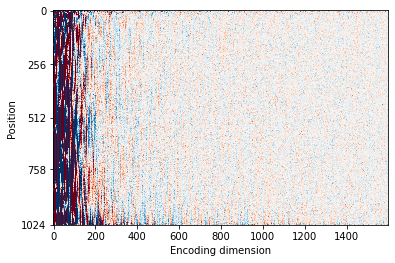

In [132]:
# sort row by their sum
# wpe_gpt_sort_idxs = np.argsort(-wpe_gpt.std(1))
wpe_gpt_sort = wpe_gpt  #wpe_gpt[wpe_gpt_sort_idxs,:]
# sort cols by their stddev
wpe_gpt_sort_idxs = np.argsort(-wpe_gpt_sort.std(0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot with filter
plt.imshow(wpe_gpt_sort, vmin=-0.02, vmax=0.02, interpolation="none", cmap=cmap)
plt.yticks([0,256,512,758,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

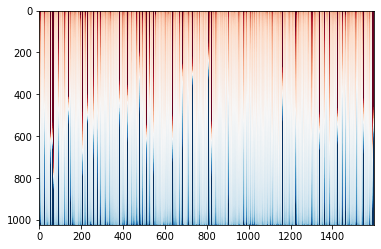

In [39]:
wpe_gpt_sort = np.sort(wpe_gpt_f, 0)
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

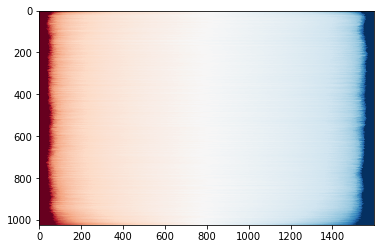

In [40]:
wpe_gpt_sort = np.sort(wpe_gpt_f, -1)
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

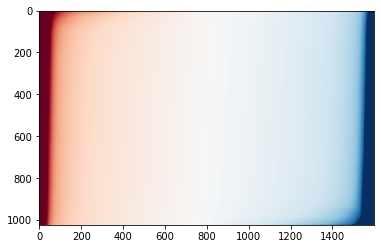

In [53]:
wpe_gpt_sort = np.sort(wpe_gpt_f, -1)
wpe_gpt_sort = np.sort(wpe_gpt_sort, 0)
plt.imshow(wpe_gpt_sort, interpolation="none", cmap=cmap)

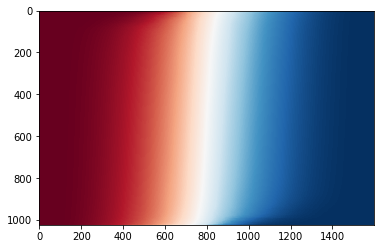

In [89]:
wpe_gpt_sort = np.sort(wpe_gpt_f, -1)
wpe_gpt_sort = np.sort(wpe_gpt_sort, 0)
plt.imshow(1/(1+np.exp(-(1000)*wpe_gpt_sort)), interpolation="none", cmap=cmap)
plt.show()

# BERT Model

In [41]:
bert = AutoModel.from_pretrained('bert-base-uncased')
wpe_bert = bert.embeddings.position_embeddings.weight.detach().numpy()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
wpe_bert.shape

(512, 768)

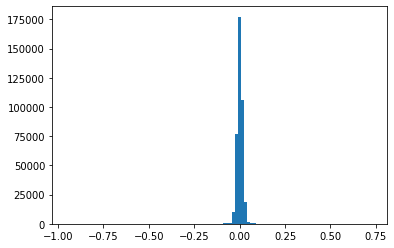

In [43]:
wpe_bert_flat = wpe_bert.flatten()
plt.hist(wpe_bert_flat, bins=100)
plt.show()

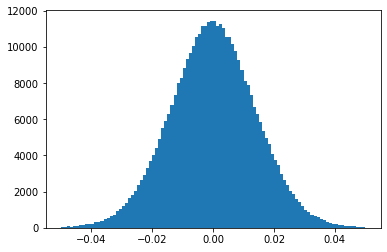

In [44]:
wpe_bert_flat = wpe_bert.flatten()
plt.hist(wpe_bert_flat, bins=100, range=[-0.05, 0.05])
plt.show()

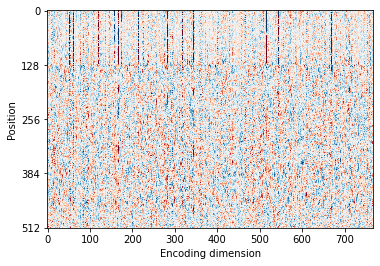

In [45]:
plt.imshow(wpe_bert, vmin=-.05, vmax=.05, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

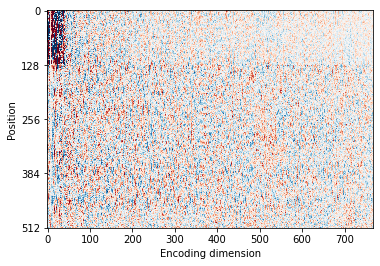

In [135]:
# sort row by their sum
wpe_bert_sort_idxs = np.argsort(-wpe_bert.std(1))
wpe_bert_sort = wpe_bert[wpe_bert_sort_idxs,:]
# sort cols by their stddev
wpe_bert_sort_idxs = np.argsort(-wpe_bert_sort.std(0))
wpe_bert_sort = wpe_bert[:,wpe_bert_sort_idxs]
# plot with filter
plt.imshow(wpe_bert_sort, vmin=-0.05, vmax=0.05, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

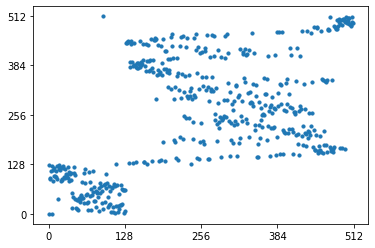

In [151]:
plt.scatter(np.arange(len(wpe_bert)), np.argsort(-wpe_bert.std(1)), s=10)
plt.xticks([0,128,256,384,512])
plt.yticks([0,128,256,384,512])
plt.show()

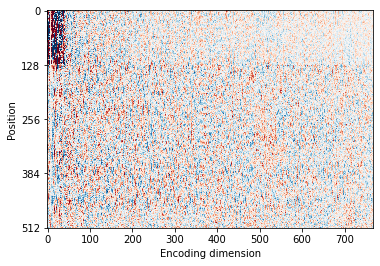

In [136]:
# sort row by their sum
# wpe_bert_sort_idxs = np.argsort(-wpe_bert.std(1))
wpe_bert_sort = wpe_bert  #wpe_bert[wpe_bert_sort_idxs,:]
# sort cols by their stddev
wpe_bert_sort_idxs = np.argsort(-wpe_bert_sort.std(0))
wpe_bert_sort = wpe_bert[:,wpe_bert_sort_idxs]
# plot with filter
plt.imshow(wpe_bert_sort, vmin=-0.05, vmax=0.05, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

## Crop data

In [46]:
wpe_bert_f = wpe_bert.copy()
wpe_bert_f[wpe_bert_f < -0.05] = -0.05
wpe_bert_f[wpe_bert_f > 0.05] = 0.05

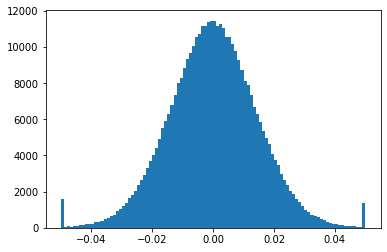

In [47]:
wpe_bert_flat = wpe_bert_f.flatten()
plt.hist(wpe_bert_flat, bins=100)
plt.show()

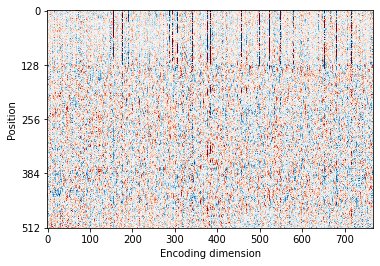

In [48]:
wpe_bert_sort_idxs = np.lexsort(wpe_bert_f, 0)
wpe_bert_sort = wpe_bert_f[:,wpe_bert_sort_idxs]
plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

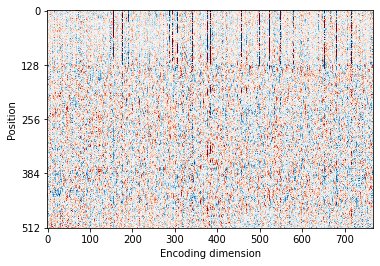

In [49]:
wpe_bert_sort_idxs = np.lexsort(wpe_bert_f, -1)
wpe_bert_sort = wpe_bert_f[:,wpe_bert_sort_idxs]
plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

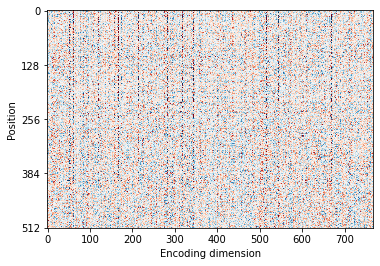

In [50]:
wpe_bert_sort_idxs = np.lexsort(wpe_bert_f, -1)
wpe_bert_sort = wpe_bert_f[:,wpe_bert_sort_idxs]

wpe_bert_sort_idxs = np.lexsort(wpe_bert_sort.T, -1)
wpe_bert_sort = wpe_bert_f.T[:,wpe_bert_sort_idxs].T

plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.show()

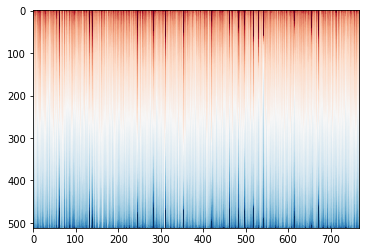

In [51]:
wpe_bert_sort = np.sort(wpe_bert_f, 0)
plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)

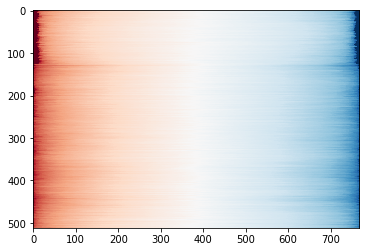

In [52]:
wpe_bert_sort = np.sort(wpe_bert_f, -1)
plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)

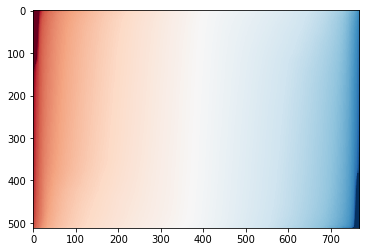

In [62]:
wpe_bert_sort = np.sort(wpe_bert_f, -1)
wpe_bert_sort = np.sort(wpe_bert_sort, 0)
plt.imshow(wpe_bert_sort, interpolation="none", cmap=cmap)

In [79]:
def logit(x, L=1, k=1, x0=0):
    return L/(1 + np.exp(-k*(x-x0)))

def plot_logit(L=1, k=1, x0=0):
    xs = np.linspace(-4,4,1000)
    plt.plot(xs, logit(xs, L, k, x0))

In [75]:
import ipywidgets as widgets
from ipywidgets import interact

In [80]:
interact(plot_logit, L=1)

interactive(children=(IntSlider(value=1, description='L', max=3, min=-1), IntSlider(value=1, description='k', …

<function __main__.plot_logit(L=1, k=1, x0=0)>